# Learn the basics of Keras API for TensorFlow.

### mnist_mlp

In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               401920    
                                                                 
 dense_61 (Dense)            (None, 512)               262656    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_62 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.1922 - accuracy: 0.6703 - val_loss

### mnist_cnn

In [ ]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 10s 19ms/step - loss: 0.7142 - accuracy: 0.7908 - val_loss: 0.2580 - val_accuracy: 0.9236
Epoch 2/12
469/469 [==============================] - 9s 18ms/step - loss: 0.3297 - accuracy: 0.9015 - val_loss: 0.1880 - val_accuracy: 0.9437
Epoch 3/12
469/469 [==============================] - 9s 19ms/step - loss: 0.2782 - accuracy: 0.9186 - val_loss: 0.1535 - val_accuracy: 0.9540
Epoch 4/12
469/469 [==============================] - 9s 19ms/step - loss: 0.2526 - accuracy: 0.9255 - val_loss: 0.1433 - val_accuracy: 0.9563
Epoch 5/12
469/469 [==============================] - 9s 19ms/step - loss: 0.2327 - accuracy: 0.9308 - val_loss: 0.1311 - val_accuracy: 0.9588
Epoch 6/12
469/469 [==============================] - 9s 18ms/step - loss: 0.2143 - accuracy: 0.9367 - val_loss: 0.1193 - val_accuracy: 0.9633
Epoch 7/12
469/469 [==============================] - 9s 18ms/step -

## Apply two reference networks on the fashion MNIST dataset: a MLP and a CNN.

Experiment with both networks, trying various options: initializations, activations, optimizers (and their hyperparameters), regularizations (L1, L2, Dropout, no Dropout).

You may also experiment with changing the architecture of both networks: adding/removing layers, number of convolutional filters, their sizes, etc.

For optimizing your hyperparameters you should use a validation set (10% of the training set).

After you have found the best-performing hyperparameter sets, take the 3 best ones and train new models on the CIFAR-10 dataset, see whether your performance gains translate to a different dataset.

### MLP network on fashion MNIST

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# 10% of traiining set is used for validation
X_train, y_train = X_train_full[:-6000], y_train_full[:-6000]
X_valid, y_valid = X_train_full[-6000:], y_train_full[-6000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# scale pixels to be between 0 and 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_initializer='he_normal'))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(momentum = 0.9),
              metrics=["accuracy"])

# callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Epoch 1/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5207 - accuracy: 0.8136 - val_loss: 0.4105 - val_accuracy: 0.8493
Epoch 2/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3850 - accuracy: 0.8584 - val_loss: 0.3655 - val_accuracy: 0.8685
Epoch 3/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3446 - accuracy: 0.8722 - val_loss: 0.3696 - val_accuracy: 0.8690
Epoch 4/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3171 - accuracy: 0.8822 - val_loss: 0.3336 - val_accuracy: 0.8790
Epoch 5/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3012 - accuracy: 0.8883 - val_loss: 0.3228 - val_accuracy: 0.8815
Epoch 6/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2823 - accuracy: 0.8947 - val_loss: 0.3430 - val_accuracy: 0.8733
Epoch 7/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2702 - accuracy: 0.8986 - val_loss: 0.3253 - val_accurac

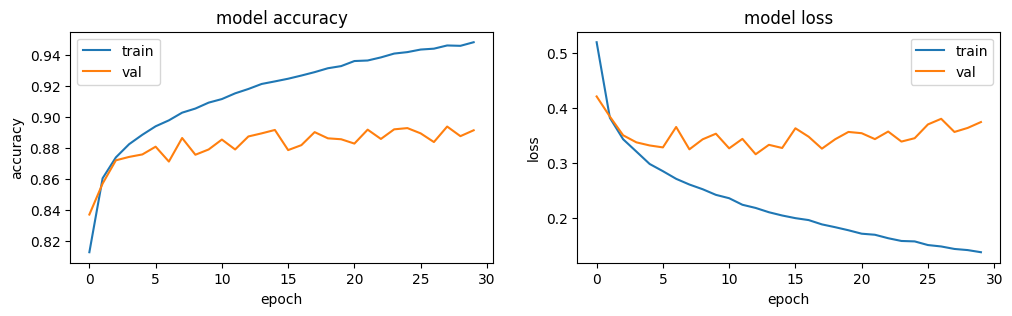

In [ ]:
#plot accuracy
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
#plt.show()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

### CNN network on fashion MNIST

In [ ]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="tanh", kernel_initializer="glorot_uniform")
model = tf.keras.Sequential([
  DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
  # DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  DefaultConv2D(filters=64),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  DefaultConv2D(filters=64),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="tanh", kernel_initializer="glorot_uniform"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=64, activation="tanh", kernel_initializer="glorot_uniform"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(momentum=0.75),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Epoch 1/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.6704 - accuracy: 0.7609 - val_loss: 0.3956 - val_accuracy: 0.8513
Epoch 2/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4429 - accuracy: 0.8454 - val_loss: 0.3602 - val_accuracy: 0.8688
Epoch 3/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3888 - accuracy: 0.8641 - val_loss: 0.3201 - val_accuracy: 0.8827
Epoch 4/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3515 - accuracy: 0.8811 - val_loss: 0.3023 - val_accuracy: 0.8908
Epoch 5/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3277 - accuracy: 0.8884 - val_loss: 0.2772 - val_accuracy: 0.9030
Epoch 6/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3050 - accuracy: 0.8953 - val_loss: 0.3049 - val_accuracy: 0.8935
Epoch 7/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2840 - accuracy: 0.9045 - val_loss: 0.2826 - val_acc

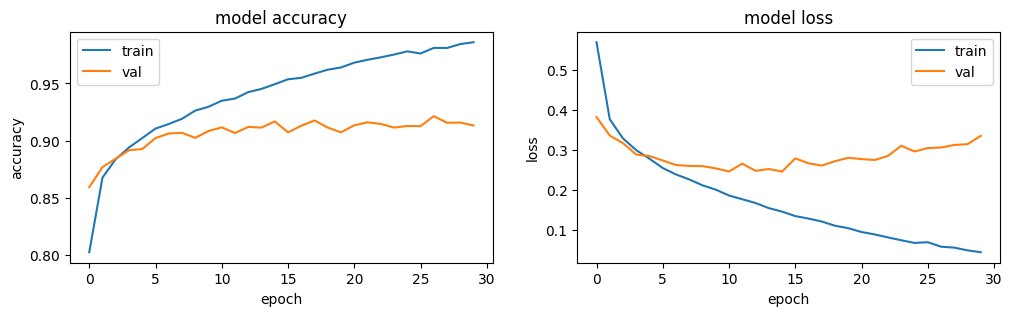

In [ ]:
#plot accuracy
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
#plt.show()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

### Best models on CIFAR 10

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

# 10% of traiining set is used for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# scale pixels to be between 0 and 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


170498071/170498071 [==============================] - 2s 0us/step


#### Model 1

In [ ]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="tanh", kernel_initializer="he_normal")
model = tf.keras.Sequential([
  DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  DefaultConv2D(filters=64),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  DefaultConv2D(filters=64),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="tanh", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=64, activation="tanh", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Epoch 1/30
1407/1407 [==============================] - 13s 8ms/step - loss: 2.0695 - accuracy: 0.2710 - val_loss: 1.7948 - val_accuracy: 0.3370
Epoch 2/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6280 - accuracy: 0.4034 - val_loss: 1.6617 - val_accuracy: 0.4254
Epoch 3/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4833 - accuracy: 0.4571 - val_loss: 1.3006 - val_accuracy: 0.5312
Epoch 4/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3855 - accuracy: 0.4988 - val_loss: 1.2311 - val_accuracy: 0.5622
Epoch 5/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3036 - accuracy: 0.5335 - val_loss: 1.1973 - val_accuracy: 0.5766
Epoch 6/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2395 - accuracy: 0.5584 - val_loss: 1.2077 - val_accuracy: 0.5738
Epoch 7/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1810 - accuracy: 0.5809 - val_loss: 1.0760 - val_ac

#### Model 2

In [ ]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="tanh", kernel_initializer="glorot_uniform")
model = tf.keras.Sequential([
  DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
  tf.keras.layers.MaxPool2D(),

  DefaultConv2D(filters=64),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  DefaultConv2D(filters=64),
  DefaultConv2D(filters=64),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="tanh", kernel_initializer="glorot_uniform"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=64, activation="tanh", kernel_initializer="glorot_uniform"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(momentum=0.75),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Epoch 1/30
1407/1407 [==============================] - 10s 6ms/step - loss: 1.7583 - accuracy: 0.3592 - val_loss: 1.3286 - val_accuracy: 0.5288
Epoch 2/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4159 - accuracy: 0.4893 - val_loss: 1.1436 - val_accuracy: 0.5876
Epoch 3/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2704 - accuracy: 0.5508 - val_loss: 1.0957 - val_accuracy: 0.6140
Epoch 4/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1740 - accuracy: 0.5913 - val_loss: 1.0039 - val_accuracy: 0.6470
Epoch 5/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0991 - accuracy: 0.6179 - val_loss: 0.9530 - val_accuracy: 0.6704
Epoch 6/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0347 - accuracy: 0.6444 - val_loss: 0.9145 - val_accuracy: 0.6854
Epoch 7/30
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9867 - accuracy: 0.6618 - val_loss: 0.8970 - val_accuracy

#### Model 3

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_initializer='he_normal'))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(momentum = 0.9),
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8903 - accuracy: 0.3099 - val_loss: 1.8353 - val_accuracy: 0.3388
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7357 - accuracy: 0.3750 - val_loss: 1.6921 - val_accuracy: 0.3860
Epoch 3/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6664 - accuracy: 0.4016 - val_loss: 1.6774 - val_accuracy: 0.3958
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6208 - accuracy: 0.4170 - val_loss: 1.6430 - val_accuracy: 0.4050
Epoch 5/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5805 - accuracy: 0.4339 - val_loss: 1.6281 - val_accuracy: 0.4256
Epoch 6/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5596 - accuracy: 0.4370 - val_loss: 1.5922 - val_accuracy: 0.4392
Epoch 7/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5279 - accuracy: 0.4531 - val_loss: 1.5690 - val_accuracy: